Data:

https://github.com/oreillymedia/doing_data_science

In [141]:
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sidetable
import numpy as np

In [61]:
with zipfile.ZipFile('dds_datasets/dds_ch2_nyt.zip') as zip_f:
    with zip_f.open('nyt1.csv') as myZip:
        data1 = pd.read_csv(myZip) 

In [62]:
# bin age
def group_age(val):
    bins = {0:'<=0', 18:'<=18', 24:'19-24', 34:'25-34', 44:'35-44',
            54:'45-54', 64:'55-64', 300:'65+'}
    
    for m, r in bins.items():
        if val <= m:
            return bins[m]

    raise Exception(f'Invalid value: {val}')

data1['age_group'] = data1['Age'].apply(group_age)

In [63]:
# calculate CTR
data1['ctr'] = data1['Clicks']/data1['Impressions']

# create category based on impression and click behavior
data1['scode'] = 'NoImps'
data1.loc[data1['Impressions'] > 0,'scode'] = 'Imps'
data1.loc[data1['Clicks']>0, 'scode'] = 'Clicks'

In [64]:
data1.head()

,Age,Gender,Impressions,Clicks,Signed_In,age_group,ctr
0,36,0,3,0,1,35-44,0.0
1,73,1,3,0,1,65+,0.0
2,30,0,3,0,1,25-34,0.0
3,49,1,3,0,1,45-54,0.0
4,47,1,11,0,1,45-54,0.0


# Univariate

In [66]:
"""
- possible for age to have value 0
- impressions are mostly less than 6
- clicks are mostly 0, therefore same for ctr
- there are users who click on every impressions or first impression
"""
data1.describe()

,Age,Gender,Impressions,Clicks,Signed_In,ctr
count,458441.000000,458441.000000,458441.000000,458441.000000,458441.000000,455375.000000
mean,29.482551,0.367037,5.007316,0.092594,0.700930,0.018471
std,23.607034,0.481997,2.239349,0.309973,0.457851,0.069034
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
50%,31.000000,0.000000,5.000000,0.000000,1.000000,0.000000
75%,48.000000,1.000000,6.000000,0.000000,1.000000,0.000000
max,108.000000,1.000000,20.000000,4.000000,1.000000,1.000000


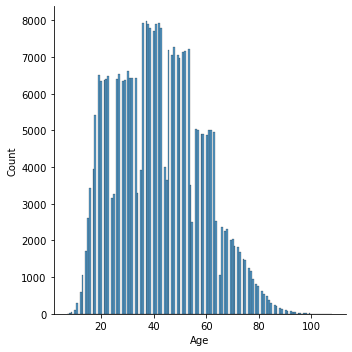

In [137]:
"""
- mostly users in their 20s - 60s
"""

sns.displot(data1[data1['Age']>0]['Age'])

In [102]:
"""
- age is mostly 0 (missing/unknown) followed by 35-44
- this is simulated data but do 7 yo kids read New York Times nowadays
"""

data1.groupby('age_group').agg({'Age':['size','min','max','mean']}).sort_values(by=('Age','size'), ascending=False)

Age                    
             size min  max       mean
age_group                            
<=0        137106   0    0   0.000000
35-44       70860  35   44  39.494680
45-54       64288  45   54  49.492580
25-34       58174  25   34  29.503352
55-64       44738  55   64  59.498189
19-24       35270  19   24  21.269039
65+         28753  65  108  72.988697
<=18        19252   7   18  16.033503

In [174]:
data1.stb.freq(['age_group'])

,age_group,count,percent,cumulative_count,cumulative_percent
0,<=0,137106,29.907011,137106,29.907011
1,35-44,70860,15.456733,207966,45.363744
2,45-54,64288,14.023179,272254,59.386922
3,25-34,58174,12.689528,330428,72.076450
4,55-64,44738,9.758726,375166,81.835176
5,19-24,35270,7.693465,410436,89.528642
6,65+,28753,6.271908,439189,95.800550
7,<=18,19252,4.199450,458441,100.000000


In [173]:
data1[data1['age_group']!='<=0'].stb.freq(['age_group'])

,age_group,count,percent,cumulative_count,cumulative_percent
0,35-44,70860,22.051753,70860,22.051753
1,45-54,64288,20.006535,135148,42.058288
2,25-34,58174,18.103848,193322,60.162136
3,55-64,44738,13.922542,238060,74.084678
4,19-24,35270,10.976084,273330,85.060762
5,65+,28753,8.947983,302083,94.008745
6,<=18,19252,5.991255,321335,100.000000


In [142]:
"""
- a bit more than half of the users are male
"""

# users who are not signed in will have gender as 0
data1[data1['Signed_In']==1].stb.freq(['Gender'])

,Gender,count,percent,cumulative_count,cumulative_percent
0,1,168265,52.364355,168265,52.364355
1,0,153070,47.635645,321335,100.000000


count    458441.000000
mean          5.007316
std           2.239349
min           0.000000
25%           3.000000
50%           5.000000
75%           6.000000
max          20.000000
Name: Impressions, dtype: float64


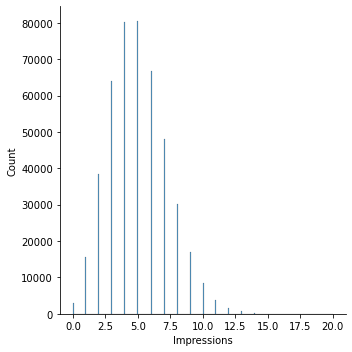

In [162]:
"""
- normal around 5 with right tail
- max at 20
"""
print(data1['Impressions'].describe())
sns.displot(data=data1, x='Impressions')

count    458441.000000
mean          0.092594
std           0.309973
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: Clicks, dtype: float64


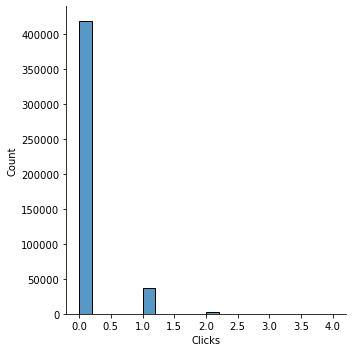

In [163]:
"""
- mostly 0 with max at 4
"""

print(data1['Clicks'].describe())
sns.displot(data=data1, x='Clicks')

count    455375.000000
mean          0.018471
std           0.069034
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: ctr, dtype: float64


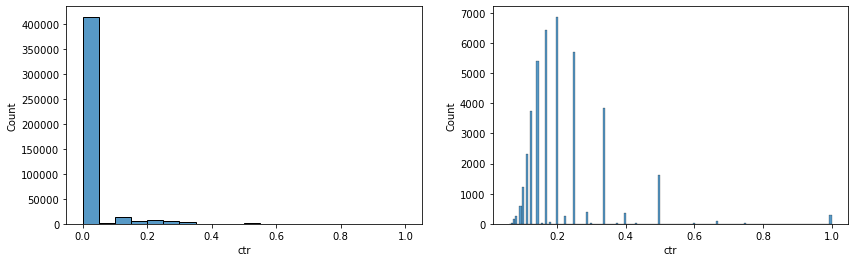

In [164]:
"""
- high concentration at 0
- peak at 0.2 if ignored 0
- max at 1, so there are users to click upon first impression or at every impression
"""

print(data1['ctr'].describe())

fig, axes = plt.subplots(1,2,figsize=(14,4))
a = sns.histplot(data1['ctr'], ax=axes[0])
b = sns.histplot(data1[data1['ctr']>0]['ctr'], ax=axes[1])

In [165]:
"""
- Most users are signed in
"""

data1.stb.freq(['Signed_In'])

,Signed_In,count,percent,cumulative_count,cumulative_percent
0,1,321335,70.092989,321335,70.092989
1,0,137106,29.907011,458441,100.000000


In [167]:
data1.stb.freq(['scode'])

,scode,count,percent,cumulative_count,cumulative_percent
0,Imps,415537,90.641326,415537,90.641326
1,Clicks,39838,8.689886,455375,99.331212
2,NoImps,3066,0.668788,458441,100.000000


# Bivariate

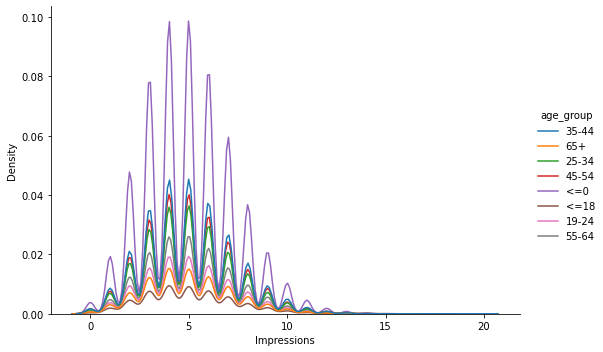

In [145]:
"""
impressions by age group
- impression seems normal around 5 for all age groups
- the long right tail is mostly the <=0 and <=18 groups
"""

sns.displot(data=data1, x='Impressions', hue='age_group', kind='kde', aspect=1.5)

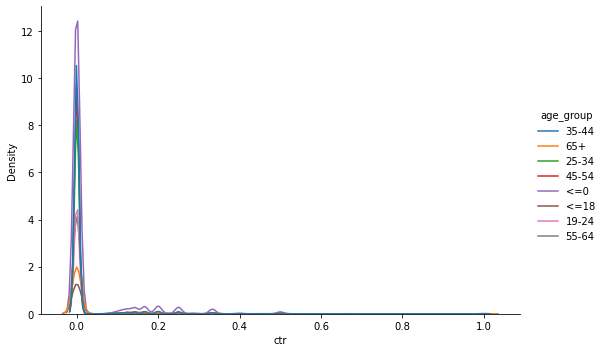

In [146]:
"""
ctr by age group
- large concentration around 0 with long right tails
- 
"""
sns.displot(data=data1[data1['Impressions']>0], x='ctr', hue='age_group', kind='kde', aspect=1.5)

In [171]:
"""
impression by gender

- female has slightly higher mean imp
"""

data1[data1["Signed_In"]==1].groupby('Gender')['Impressions'].mean()

Gender
0    5.012733
1    5.008629
Name: Impressions, dtype: float64

In [175]:
"""
ctr by gender

- female has slightly higher mean ctr
"""

data1[data1["Signed_In"]==1].groupby('Gender')['ctr'].mean()

Gender
0    0.014622
1    0.013919
Name: ctr, dtype: float64

In [176]:
data1.groupby('Signed_In')['ctr'].mean()

Signed_In
0    0.028355
1    0.014254
Name: ctr, dtype: float64

# Multivariate

In [ ]:
"""
impression and ctr by signed in
- there are more users who signed in than not
- higher average ctr for users who do not sign in 
- higher average impressions for users who sign in 
"""

data1.groupby(['Signed_In']).agg({'Impressions':['mean','size'],'ctr':['mean','size']})

In [84]:
"""
- users with no age info are also missing gender and are not signed in
- 65+ has highest average ctr and average # of clicks and impressions
- 65+ group also has more female (female:0, male:1) than any other groups (aside from 0 where it's unknown)
- <=18 groups has more male
- 19-24 has the lowest average ctr but higher average impressions than users who are <=34
"""

data1.groupby('age_group').agg({'Gender':'mean','Signed_In':'mean','Impressions':'mean',
                                'Clicks':'mean', 'ctr':'mean'})

,Gender,Signed_In,Impressions,Clicks,ctr
age_group,,,,,
19-24,0.533853,1,5.006635,0.048455,0.009720
25-34,0.532162,1,4.993829,0.050486,0.010146
35-44,0.531696,1,5.021507,0.051679,0.010286
45-54,0.528979,1,5.010406,0.050274,0.009958
55-64,0.536188,1,5.022308,0.101837,0.020307
65+,0.363266,1,5.012347,0.151289,0.029803
<=0,0.000000,0,4.999657,0.142080,0.028355
<=18,0.642115,1,4.998961,0.131051,0.026621


In [85]:
data1[data1['Impressions']>15]['age_group'].value_counts()

<=0      15
<=18      6
35-44     5
45-54     4
65+       3
19-24     3
25-34     2
55-64     1
Name: age_group, dtype: int64

In [124]:
"""
- among users who click, males seem to have higher average impression but female has higher
  average ctr
- among users who did not click but have impressions, females has slightly higher average impressions
"""

data1.groupby(['Signed_In','scode','Gender'])\
     .agg({'Impressions':['size','min','max','mean'],
           'ctr':['size','min','max','mean']})\
     .sort_values(by=['Signed_In','scode','Gender',('Impressions','mean')], ascending=[True,True,True,False])

Impressions                       ctr                 \
                               size min max      mean    size       min  max   
Signed_In scode  Gender                                                        
0         Clicks 0            17776   1  17  5.922480   17776  0.058824  1.0   
          Imps   0           118401   1  18  4.900339  118401  0.000000  0.0   
          NoImps 0              929   0   0  0.000000     929       NaN  NaN   
1         Clicks 0            10759   1  15  5.974161   10759  0.066667  1.0   
                 1            11303   1  17  5.996107   11303  0.058824  1.0   
          Imps   0           141293   1  17  4.975639  141293  0.000000  0.0   
                 1           155843   1  20  4.972973  155843  0.000000  0.0   
          NoImps 0             1018   0   0  0.000000    1018       NaN  NaN   
                 1             1119   0   0  0.000000    1119       NaN  NaN   

                                   
                             mean  
Signed_In scode  Gender            
0         Clicks 0       0.217219  
          Imps   0       0.000000  
          NoImps 0            NaN  
1         Clicks 0       0.206646  
                 1       0.205824  
          Imps   0       0.000000  
                 1       0.000000  
          NoImps 0            NaN  
                 1            NaN

In [126]:
"""
- 65+ female users have highest average impressions and 19-24 for males
"""

data1.groupby(['Signed_In','scode','Gender','age_group'])\
     .agg({'Impressions':['size','min','max','mean']})\
     .sort_values(by=['Signed_In', 'scode', 'Gender', ('Impressions','mean')], ascending=[True,True,True,False])


Impressions                  
                                         size min max      mean
Signed_In scode  Gender age_group                              
0         Clicks 0      <=0             17776   1  17  5.922480
          Imps   0      <=0            118401   1  18  4.900339
          NoImps 0      <=0               929   0   0  0.000000
1         Clicks 0      65+              2598   1  15  6.006928
                        35-44            1675   1  15  5.996418
                        19-24             779   1  15  5.985879
                        45-54            1494   1  14  5.985274
                        55-64            2006   1  14  5.973579
                        25-34            1361   1  13  5.923586
                        <=18              846   1  15  5.881797
                 1      19-24             890   1  14  6.092135
                        45-54            1645   1  16  6.025532
                        35-44            1917   1  14  6.022431
                        65+              1486   1  16  5.991252
                        55-64            2331   1  16  5.990991
                        25-34            1509   1  15  5.944997
                        <=18             1525   1  17  5.938361
          Imps   0      19-24           15538   1  17  5.001352
                        45-54           28563   1  17  4.996254
                        35-44           31290   1  16  4.994567
                        25-34           25690   1  17  4.991436
                        55-64           18626   1  15  4.952056
                        <=18             6001   1  16  4.917014
                        65+             15585   1  16  4.898941
                 1      35-44           35512   1  20  5.011123
                        45-54           32143   1  16  4.994773
                        19-24           17807   1  16  4.986129
                        25-34           29241   1  15  4.967272
                        55-64           21499   1  15  4.953858
                        <=18            10754   1  16  4.900595
                        65+              8887   1  16  4.867897
          NoImps 0      19-24             124   0   0  0.000000
                        25-34             165   0   0  0.000000
                        35-44             219   0   0  0.000000
                        45-54             224   0   0  0.000000
                        55-64             118   0   0  0.000000
                        65+               125   0   0  0.000000
                        <=18               43   0   0  0.000000
                 1      19-24             132   0   0  0.000000
                        25-34             208   0   0  0.000000
                        35-44             247   0   0  0.000000
                        45-54             219   0   0  0.000000
                        55-64             158   0   0  0.000000
                        65+                72   0   0  0.000000
                        <=18               83   0   0  0.000000

In [127]:
"""
- for both males and females, <=18 has the highest average ctr yet they also both have
  lowest average impression among the "clicks" users based on previous table
"""

data1.groupby(['Signed_In','scode','Gender','age_group'])\
     .agg({'ctr':['size','min','max','mean']})\
     .sort_values(by=['Signed_In','scode','Gender',('ctr','mean')], ascending=[True,True,True,False])


ctr                         
                                     size       min  max      mean
Signed_In scode  Gender age_group                                 
0         Clicks 0      <=0         17776  0.058824  1.0  0.217219
          Imps   0      <=0        118401  0.000000  0.0  0.000000
          NoImps 0      <=0           929       NaN  NaN       NaN
1         Clicks 0      <=18          846  0.066667  1.0  0.213515
                        55-64        2006  0.071429  1.0  0.209594
                        65+          2598  0.066667  1.0  0.208961
                        19-24         779  0.066667  1.0  0.205703
                        45-54        1494  0.071429  1.0  0.204945
                        25-34        1361  0.076923  1.0  0.202455
                        35-44        1675  0.066667  1.0  0.201418
                 1      <=18         1525  0.058824  1.0  0.215417
                        65+          1486  0.062500  1.0  0.207380
                        55-64        2331  0.062500  1.0  0.206965
                        25-34        1509  0.066667  1.0  0.206048
                        19-24         890  0.071429  1.0  0.202371
                        35-44        1917  0.076923  1.0  0.201732
                        45-54        1645  0.062500  1.0  0.200338
          Imps   0      19-24       15538  0.000000  0.0  0.000000
                        25-34       25690  0.000000  0.0  0.000000
                        35-44       31290  0.000000  0.0  0.000000
                        45-54       28563  0.000000  0.0  0.000000
                        55-64       18626  0.000000  0.0  0.000000
                        65+         15585  0.000000  0.0  0.000000
                        <=18         6001  0.000000  0.0  0.000000
                 1      19-24       17807  0.000000  0.0  0.000000
                        25-34       29241  0.000000  0.0  0.000000
                        35-44       35512  0.000000  0.0  0.000000
                        45-54       32143  0.000000  0.0  0.000000
                        55-64       21499  0.000000  0.0  0.000000
                        65+          8887  0.000000  0.0  0.000000
                        <=18        10754  0.000000  0.0  0.000000
          NoImps 0      19-24         124       NaN  NaN       NaN
                        25-34         165       NaN  NaN       NaN
                        35-44         219       NaN  NaN       NaN
                        45-54         224       NaN  NaN       NaN
                        55-64         118       NaN  NaN       NaN
                        65+           125       NaN  NaN       NaN
                        <=18           43       NaN  NaN       NaN
                 1      19-24         132       NaN  NaN       NaN
                        25-34         208       NaN  NaN       NaN
                        35-44         247       NaN  NaN       NaN
                        45-54         219       NaN  NaN       NaN
                        55-64         158       NaN  NaN       NaN
                        65+            72       NaN  NaN       NaN
                        <=18           83       NaN  NaN       NaN

# Final Thoughts

- Most users in this dataset have ages range from 20 to 60
- Users can choose to sign in or not, if not their age and gender will not be captured
- Most users in this dataset are signed in users (I think you have to sign in/create an account after reading a few articles to continue reading the NYT?)
- Among the users who signed in, there are more male users than female
- Generally no clicks but there are some users who click upon first impression or upon every impression. Max # of clicks in this dataset is 4.
- female has a slightly higher average ctr and average impression. Would need to run stat test to confirm significance
- Users who are <=18 seem to have the smallest average impressions but highest average ctr compared to all other age groups for both male and female